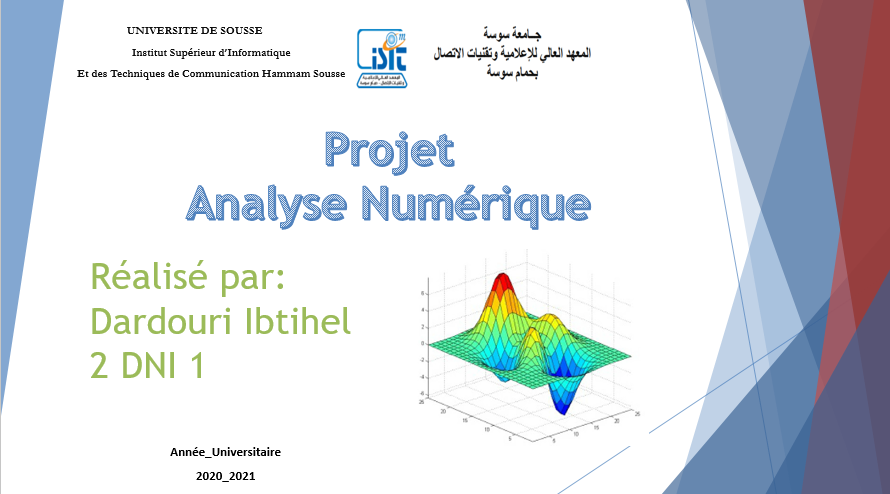

In [1]:
from scipy.integrate import quad
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from numpy import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
from tkinter import ttk

In [2]:
class RectangleG (object) :
    def __init__ (self , a , b ,n ,f , c) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
        self.c = c
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = sum(y[ 0 : -1])
        return h*s
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , yl[i] , yl[i] , 0 , 0 ]
            self.c.plot(x_rect , y_rect ,'r')
        yflist_fine = f(xlist_fine)
        self.c.plot(xlist_fine,yflist_fine)
        self.c.plot(xl , yl , "bo")
        self.c.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
        
            

In [3]:
class trapeze(object) :
    def __init__ (self , a , b ,n ,f , c) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
        self.c = c
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h*s/2.0
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , yl[i] , yl[i] , 0 , 0 ]
            self.c.plot(x_rect , y_rect ,"m")
        yflist_fine = f(xlist_fine)
        self.c.plot(xlist_fine,yflist_fine)
        self.c.plot(xl , yl , "cs")
        self.c.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )



In [4]:
class Simpson(object) :
    def __init__ (self , a , b ,n ,f , c) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
        self.c = c
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[2] - x[1])
        n = len(x) -1
        if n % 2 == 1 :
            s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            xx = np.linspace(xl[ i ],xl[i + 1],resolution)
            m = (xl[i]+ xl[i + 1])/ 2
            a = xl[i]
            b = xl[i +1]
            l0  =(xx-m)/(a-m)*(xx-b)/(a-b)
            l1 =(xx-a)/(m-a)*(xx-b)/(m-b)
            l2 =(xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2
            self.c.plot(xx , P ,'r')
            self.c.plot(m , f(m) ,'g*')
        yflist_fine = f(xlist_fine)
        self.c.plot(xlist_fine,yflist_fine , 'y')
        self.c.plot(xl , yl , "bo")
        self.c.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
        

In [5]:
class Milieu(object) :
    def __init__ (self , a , b ,n ,f,c) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n   
        self.c = c
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = 0
        for i in range (self.n) :
            s = s+f((x[i]+x[i+1])*0.5) 
        return h*s
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            m = (xl[i] + xl[i+1])/2
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , f(m) , f(m) , 0 , 0 ]
            self.c.plot(x_rect , y_rect ,'g')
            self.c.plot(m , f(m) ,'r*')
        yflist_fine = f(xlist_fine)
        self.c.plot(xlist_fine,yflist_fine , 'b')
        self.c.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15)
       

In [6]:
class mclass:
    def __init__(self,  window):
        self.window = window
        self.fr1 = Frame(window,highlightbackground="darkorange", highlightthickness=2, width=100, height=100, bd= 5)
        self.fr2 = Frame(window,highlightbackground="orange", highlightthickness=2, width=100, height=100, bd= 5)
        ###############################
        self.func_txt=StringVar()
        self.func_txt.set("Fonction est:")
        self.label_func=Label(self.fr1, textvariable=self.func_txt,justify=RIGHT, height=4)
        self.label_func.grid(row=1,column=0)
        #################################
        self.a_txt=StringVar()
        self.a_txt.set("a:")
        self.label_a=Label(self.fr1, textvariable=self.a_txt,justify=RIGHT, anchor="w", height=4)
        self.label_a.grid(sticky = E,row=2,column=0)
        
        self.boxa = Entry(self.fr1,width=10,borderwidth=3,bg="bisque")
        self.boxa.grid(sticky = W,row=2,column=1)
        #################################
        self.b_txt=StringVar()
        self.b_txt.set("b:")
        self.label_b=Label(self.fr1, textvariable=self.b_txt,justify=RIGHT, anchor="w", height=4)
        self.label_b.grid(sticky = E,row=3,column=0)
        self.boxb = Entry(self.fr1,width=10,borderwidth=3,bg="bisque")
        self.boxb.grid(sticky = W,row=3,column=1)
        self.box = Entry(self.fr1,borderwidth=3,bg="bisque")
        self.box.grid(row=1,column=1)
        #######################################
        self.slider_txt=StringVar()
        self.slider_txt.set("N:")
        self.label_slider=Label(self.fr1, textvariable=self.slider_txt,justify=RIGHT, anchor="w", height=4)
        self.label_slider.grid(sticky = E,row=4,column=0)
        self.hori=Scale(self.fr1,variable=IntVar, from_=1, to=100, orient=HORIZONTAL)
        self.hori.grid(sticky = W,row=4, column=1)
       
        
        ####################################
        self.methode_txt=StringVar()
        self.methode_txt.set("Méthode de:")
        self.label_methode=Label(self.fr1,textvariable=self.methode_txt,justify=RIGHT,anchor="w",height=5,font='Arial, 8',bg="wheat")
        self.label_methode.grid(sticky = W,row=5,column=0)
        #################################
        self.liste_combo=StringVar()
        self.cmb=ttk.Combobox(self.fr1,textvariable=self.liste_combo, values=['Simpson','Milieu' , 'Rectangle','Trapéze'])
        self.cmb.grid(sticky = W ,row=5,column=1)
        self.cmb.current(0)
        ####################################
        self.button = Button (self.fr1, width =35,text="Tracer",bg="lightcoral", command=self.plot)
        self.button.grid(row=6,column=0,columnspan=3)
        #################################
        #self.integ_txt=StringVar()
        #self.integ_txt.set("I_ :")
        #self.label_i=Label(self.fr1, textvariable=self.integ_txt,justify=RIGHT, anchor="w", height=8)
        #self.label_i.grid(sticky = E,row=7,column=0)
        
        #self.boxi = Entry(self.fr1,width=15,borderwidth=3,bg="bisque")
        #self.boxi.grid(sticky = W,row=7,column=1)
        #self.label['text'] = "( 0.5*( label_a.value+ label_b.value ) , f(label_b.value ) , 'I_{} ={:0.8f}'.format(label_slider,self.integrate( label_func.value ) ) , fontsize =15 )
        #func=lambda x:eval(label_func.value) "
        #self.boxi.set( 0.5*( label_a.value+ label_b.value ) , f(label_b.value ) , 'I_{} ={:0.8f}'.format(label_slider,self.integrate( label_func.value ) ) , fontsize =15 )
        #func=lambda x:eval(label_func.value) 
        #dic={1:RectangleG,2:trapeze,3:Simpson,4:Milieu}
        #s=self.cmb.values
        #R=dic[s](float(label_a.value), float(label_b.value),int(label_slider.value),func)
        #self.label_i.value=str(R.integrate(func))
        #self.integ_txt.description='I_'+label_slider.value
        #################################
        self.fr1.grid(row=1,column=0,padx=10,pady=10,sticky="ns")
        self.fr2.grid(row=1,column=1,padx=10,pady=10)
        self.fig = Figure(figsize=(6,6))
        self.a = self.fig.add_subplot(111)
        self.a.set_title ("Graphe de F", fontsize=16)
        self.a.set_ylabel("y=f(x)", fontsize=14)
        self.a.set_xlabel("x", fontsize=14)
        self.a.set_facecolor("moccasin")
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.fr2)
        self.canvas.get_tk_widget().pack()
        self.canvas.draw()
       

    def plot (self):
        #################
        if self.cmb.get() == "Simpson":
            f= lambda x: eval(self.box.get())
            x=np.linspace(float(self.boxa.get()), float(self.boxb.get()), 1001)
            pp=f(x)
            self.a.cla()
            self.a.set_xlim([float(self.boxa.get()), float(self.boxb.get())])
            self.a.xaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.yaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.set_title (" Méthode de Simpson ", fontsize=22,color = 'red')
            self.a.set_ylabel("y=f(x)", fontsize=14)
            self.a.set_xlabel("x", fontsize=14)
            self.a.grid(True)
            Simp= Simpson(float(self.boxa.get()),float(self.boxb.get()), int(self.hori.get()), f,self.a)
            Simp.graphe(f)
            self.fig.canvas.draw()
            #################################
        if self.cmb.get() == "Milieu":
            f= lambda x: eval(self.box.get())
            x=np.linspace(float(self.boxa.get()), float(self.boxb.get()), 1001)
            pp=f(x)
            self.a.cla()
            self.a.set_xlim([float(self.boxa.get()), float(self.boxb.get())])
            self.a.xaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.yaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.set_title (" méthode de Milieu ", fontsize=22,color = 'green')
            self.a.set_ylabel("y=f(x)", fontsize=14)
            self.a.set_xlabel("x", fontsize=14)
            self.a.grid(True)
            Mil= Milieu(float(self.boxa.get()),float(self.boxb.get()), int(self.hori.get()), f,self.a)
            Mil.graphe(f)
            self.fig.canvas.draw()
        ###############################################
        if self.cmb.get() == "Rectangle":
            f= lambda x: eval(self.box.get())
            x=np.linspace(float(self.boxa.get()), float(self.boxb.get()), 1001)
            pp=f(x)
            self.a.cla()
            self.a.set_xlim([float(self.boxa.get()), float(self.boxb.get())])
            self.a.xaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.yaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.set_title (" Méthode des Rectangles ", fontsize=22,color = 'green')
            self.a.set_ylabel("y=f(x)", fontsize=14)
            self.a.set_xlabel("x", fontsize=14)
            self.a.grid(True)
            Rec= RectangleG(float(self.boxa.get()),float(self.boxb.get()), int(self.hori.get()), f,self.a)
            Rec.graphe(f)
            self.fig.canvas.draw()
        ###############################################
        if self.cmb.get() == "Trapéze":
            f= lambda x: eval(self.box.get())
            x=np.linspace(float(self.boxa.get()), float(self.boxb.get()), 1001)
            pp=f(x)
            self.a.cla()
            self.a.set_xlim([float(self.boxa.get()), float(self.boxb.get())])
            self.a.xaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.yaxis.set_ticks(np.arange(float(self.boxa.get()),float(self.boxb.get()), 1))
            self.a.set_title (" Méthode des Trapézes ", fontsize=22,color = 'green')
            self.a.set_ylabel("y=f(x)", fontsize=14)
            self.a.set_xlabel("x", fontsize=14)
            self.a.grid(True)
            Trap= trapeze(float(self.boxa.get()),float(self.boxb.get()), int(self.hori.get()), f,self.a)
            Trap.graphe(f)
            self.fig.canvas.draw()


window= Tk()

start= mclass(window)

window.mainloop()


